In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['figure.facecolor'] = 'white'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/brettnaul/miniconda3/envs/deep/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
from keras import backend as K
import sample_data
%run autoencoder.py 64 2 0.25 --uneven --model_type gru --sigma 0.0 --lr 5e-4 --sim_type autoencoder/uneven_t100/noise0 --nb_epoch 0
Y = sample_data.phase_to_sin_cos(Y)
train = np.arange(args.N_train)
test = args.N_train + np.arange(args.N_test)

Skipping PhasedLSTM...
[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/autoencoder/uneven_t100/noise0/gru_064_x2_5m04_drop25
Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Please switch to tf.summary.merge_all.


# Visualizing predictions

In [10]:
%%time
pred = model.predict({'main_input': X, 'aux_input': X[:, :, [0,]]}, batch_size=500)

CPU times: user 6min 24s, sys: 1min 59s, total: 8min 24s
Wall time: 1min 38s


In [11]:
train = np.arange(args.N_train); test = args.N_train + np.arange(args.N_test)
i = train[0] - 1

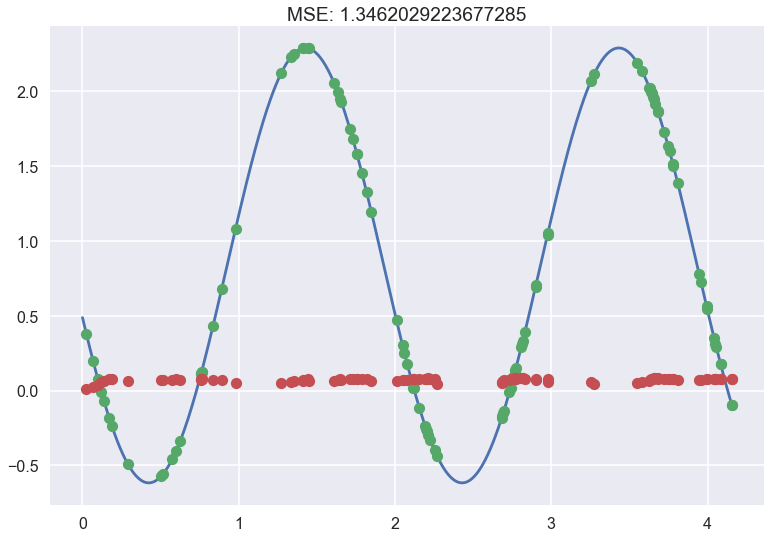

In [12]:
i += 1
if args.even:
    t = np.linspace(0, 2 * np.pi, X.shape[1])
    m = X[i, :, 0]
    pred_i = model.predict(X[[i]])[0, :, 0]
else:
    inds = (X[i, :, 0] >= 0.)
    t = X_raw[i, inds, 0]
    m_raw = X_raw[i, inds, 1]
    m = X[i, inds, 1]
    pred_i = model.predict({'main_input': X[i:i+1], 'aux_input': X[i:i+1, :, [0,]]})[0, inds, 0]

T = np.linspace(0, t.max(), 501)
def sinusoid(p, A1, A2, b):
    return lambda t: A1 * np.cos(2 * np.pi / p * t) + A2 * np.sin(2 * np.pi / p * t) + b

plt.plot(T, sinusoid(*Y[i])(T))
plt.plot(t, m, 'o')
plt.plot(t, pred_i, 'o')

#w_r, A_r, phi_r, b_r = pred_gru[i]
#x_r = A_r * np.sin(2 * np.pi * w_r * t + phi_r) + b_r
#plt.plot(t, x_r, '--')
#plt.legend(['Noisy', 'Original'])
plt.title("MSE: {}".format(np.mean((m_raw - pred_i) ** 2)));

# Visualizing training progress